In [14]:
import sys
sys.path.append("../../")
import math as m
import random
import matplotlib.pyplot as plt
import numpy as np


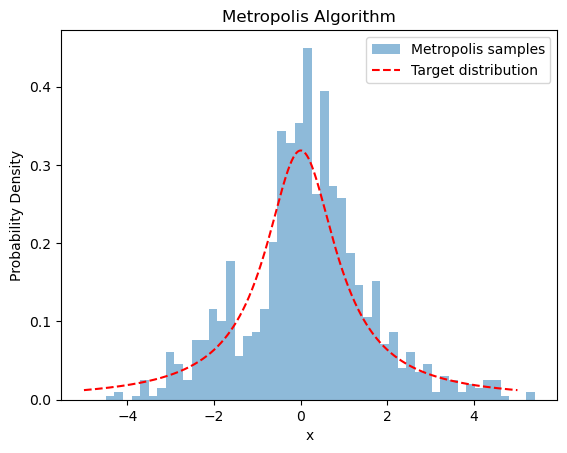

efficiency is:  0.421


"\n# Plot the Lorentzian function\nplt.plot(x_values, y_values, color='blue', label='Lorentzian Function')\nplt.xlabel('x')\nplt.ylabel('Lorentzian(x)')\nplt.title('Lorentzian Function')\nplt.legend()\nplt.grid(True)\nplt.show()\n"

In [19]:
#create the target distribution: (Lorentzian)
def target_distribution(x, x0, gamma):
    return (1 / np.pi) * (gamma / ((x - x0) ** 2 + gamma ** 2))

# Define range of x values
x_values = np.linspace(-10, 10, 1000)

# Parameters for the Lorentzian function
x0 = 0  # Location parameter
gamma = 1  # Scale parameter

# Calculate the Lorentzian function values
y_values = target_distribution(x_values, x0, gamma)

#create the proposal distribution:
def proposal_distribution(x, sigma):
    return np.random.normal(loc=x, scale=sigma)

#plt.plot(x_values,proposal_distribution(x_values,1))

# Metropolis algorithm
vector_x=[]
vector_y=[]
def metropolis(n_samples, sigma):
    samples = []
    current_state = np.random.randn()  # Initial state: give me a random number from a std normal distribution
    number=0
    for _ in range(n_samples):
        candidate = proposal_distribution(current_state, sigma)
        #print(candidate)
        a = target_distribution(candidate,0,1)/target_distribution(current_state,0,1)
        b = proposal_distribution(current_state,sigma)/proposal_distribution(candidate,sigma)
        acceptance_ratio = min(1, a*b)
        if np.random.rand() < acceptance_ratio:
            current_state = candidate
            number = number + 1
        samples.append(current_state) #N.B: this i put out of for because later i'll draw histogram and histogram draw the probability of a number(so it's important see how many a number compares)
        vector_x.append(current_state)
        vector_y.append(target_distribution(current_state,0,1))
        #print(samples)
    return samples, number



# Number of samples to generate
n_samples = 1000
# Standard deviation for the proposal distribution
sigma = 1.0

# Generate samples using Metropolis algorithm
samples, number = metropolis(n_samples,sigma)

# Plot the histogram of samples along with the target distribution
plt.hist(samples, bins=50, density=True, alpha=0.5, label='Metropolis samples')
#plt.scatter(vector_x, vector_y, color='green',marker='o')
x = np.linspace(-5, 5, 1000)
plt.plot(x, target_distribution(x,0,1), color='red', linestyle='--', label='Target distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Metropolis Algorithm')
plt.legend()
plt.show()
print("efficiency is: ", number/n_samples)

'''
def flat_distribution(min_val,max_val):
    return np.random.uniform(min_val,max_val) #np.full(1000,value)

#y=np.full(1000,flat_distribution(0,10,1000))
y=[]
for i in range(1000):
    y.append(flat_distribution(0,10))
#plt.plot(x, y, color='red', linestyle='--', label='Target distribution')
plt.scatter(x_values, y, color='green',marker='o')
plt.show()
'''
'''
vector_x=[]
vector_y=[]
def metropolis(n_samples):
    samples=[]
    #take a random state
    n_min=-4
    y_min_target=0
    start_state = 10 #np.random.uniform(n_min,4)
    current_state = start_state
    for i in range(n_samples):
        candidate = flat_distribution(y_min_target,current_state) #current_state 
        #print(candidate)
        a = target_distribution(candidate,0,1)/target_distribution(current_state,0,1)
        b = flat_distribution(n_min,current_state)/flat_distribution(n_min,candidate)
        alpha = min(1,a * b) #acceptance ratio
        #print(alpha)
        random_number = np.random.uniform(0,1)
        if random_number <=alpha:
            current_state = candidate
            print(current_state)
        samples.append(current_state)
        vector_x.append(current_state)
        vector_y.append(flat_distribution(y_min_target,current_state))
    return samples
'''
'''
# Plot the Lorentzian function
plt.plot(x_values, y_values, color='blue', label='Lorentzian Function')
plt.xlabel('x')
plt.ylabel('Lorentzian(x)')
plt.title('Lorentzian Function')
plt.legend()
plt.grid(True)
plt.show()
'''

CORNER PLOT

In [20]:
'''
import corner

# Generate synthetic data
np.random.seed(42)
data = np.random.multivariate_normal([0, 0, 0], [[1, 0.5, 0.5], [0.5, 1, 0.5], [0.5, 0.5, 1]], size=1000)

# Create corner plot
figure = corner.corner(data, labels=["X", "Y", "Z"], quantiles=[0.16, 0.5, 0.84], show_titles=True, title_kwargs={"fontsize": 12})

# Display the plot
plt.show()
'''

ModuleNotFoundError: No module named 'corner'